# Term Deposit Subscription Prediction
#### Vineet Gandham

## Contents


- Introduction
- Importing Dependencies
- EDA
- Data Preprocessing
- Modelling Approaches
  - Artifical Neural Networks
  - SVM
  - Logistic Regression
- Result

## Introduction

 In Term Deposits, the sum of money is kept for a fixed maturity and the depositor is not allowed to withdraw this sum till the end of the maturity period. That is why they are called as Term Deposits because they are kept up to a particular term.
 The data is related with direct marketing campaigns of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit.

The dependant data is of 4 categories:
- bank client data
- related with the last contact of the current campaign:
- other attributes
- social and economic context attributes

### Importing Dependencies

In [25]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
import category_encoders as ce

In [26]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.constraints import maxnorm
from keras.regularizers import l2

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [29]:
import pandas as pd # data processing, CSV file I/O 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [30]:
 import warnings

In [31]:
np.set_printoptions(suppress=True)

In [32]:
#plotly offline libraries
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)
import plotly.io as pio

pio.renderers
pio.renderers.default = "svg"

### Data Extraction

In [33]:
#reading csv file
dataset=pd.read_csv('train.csv')
dataset_toPredict=pd.read_csv('test.csv')

In [34]:
dataset.head(5)


,id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,1,57,services,married,high.school,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,37,services,married,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,4,56,services,married,high.school,no,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,5,45,services,married,basic.9y,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [35]:
dataset_toPredict.head(5)

,id,age,job,marital,education,default,housing,loan,contact,month,...,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,3,40,admin.,married,basic.6y,no,no,no,telephone,may,...,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,6,59,admin.,married,professional.course,no,no,no,telephone,may,...,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,10,41,blue-collar,married,unknown,unknown,no,no,telephone,may,...,55,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,11,25,services,single,high.school,no,yes,no,telephone,may,...,222,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,13,57,housemaid,divorced,basic.4y,no,yes,no,telephone,may,...,293,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [36]:
#checking for null values
dataset.isnull().any()

id                False
age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [37]:
dataset_toPredict.isnull().any()

id                False
age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
dtype: bool

None of the datasets have null values

### EDA

In [38]:
df=dataset

In [39]:
df.describe()

,id,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,32978.000000,32978.000000,32978.000000,32978.000000,32978.000000,32978.000000,32978.000000,32978.000000,32978.000000,32978.000000,32978.000000
mean,20620.844533,40.042392,258.808145,2.563376,961.752471,0.174480,0.079562,93.574961,-40.508163,3.618474,5166.942198
std,11878.692749,10.466038,259.565427,2.770355,188.683048,0.497501,1.571342,0.579191,4.633056,1.735421,72.341606
min,0.000000,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,10346.250000,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,20649.500000,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,30887.750000,47.000000,320.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,41187.000000,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


There are 32978 rows of complete data
The mean age is 40, so most of the targetted customers were old enough to have savings to deposit money


In [40]:
def subbargraph(feature,df,title):
    fig, axes = plt.subplots(figsize=(15,8))
    data = df[feature].value_counts(normalize=True)
    axes.bar(data.index, data*100, color=['green', 'red','blue'])
    axes.set_title(title)
    axes.set_ylabel('Percentage')
    axes.set_xlabel(feature)
    for index,data in enumerate(data):
        plt.text(x=index , y =data+2 , s=f"{round(data,2)*100}" , fontdict=dict(fontsize=10))
    plt.show()

#### Distribution of Target Variable

In [41]:
#Creating a Dataframe which has only rows where the customers have subscribed 
subdf=df.loc[df['y'] == "yes",:]

In [42]:
#Creating a Dataframe which has only rows where the customers have not subscribed 
nosubdf=df.loc[df['y'] == "no",:]

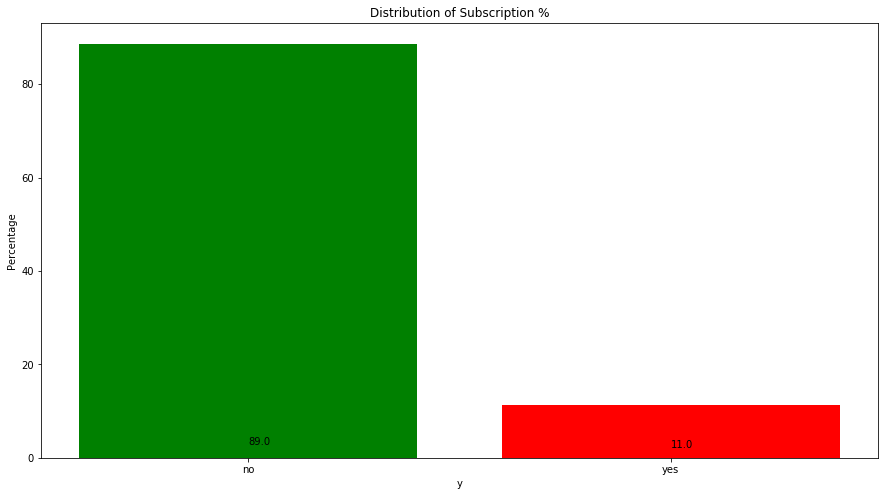

In [43]:
subbargraph('y',df,"Distribution of Subscription %")

Most of the customers who were called ,declined to term deposit. Skewed to declination.

In [44]:
def hoverpie(names,df,title):
    fig = px.pie(df,title=title, names=names)
    fig.show()

In [45]:
reqcollist=[i for i in range(2,11)]
reqcollist.append(14)

#### Age

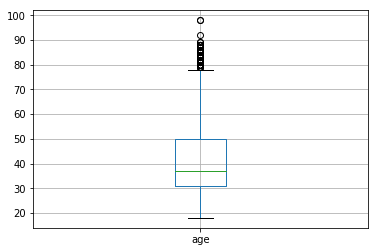

In [46]:
subdf.boxplot('age')

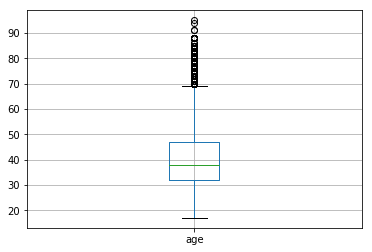

In [47]:
nosubdf.boxplot('age')

There is almost no difference in range,median and interquartile distance between ages of people who subscribed and who didn't.

#### Type of job (categorical):

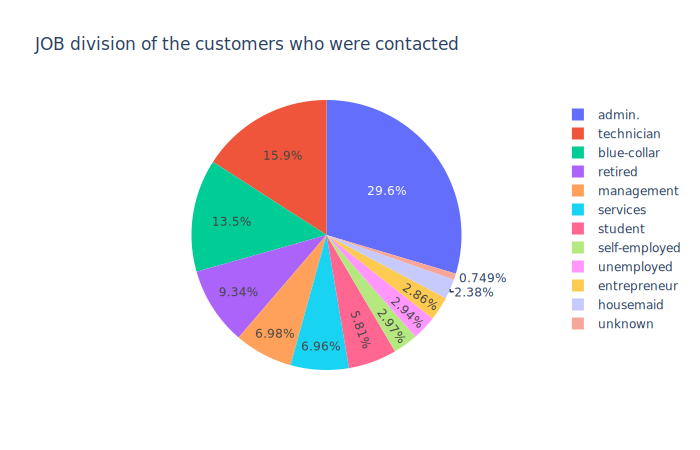

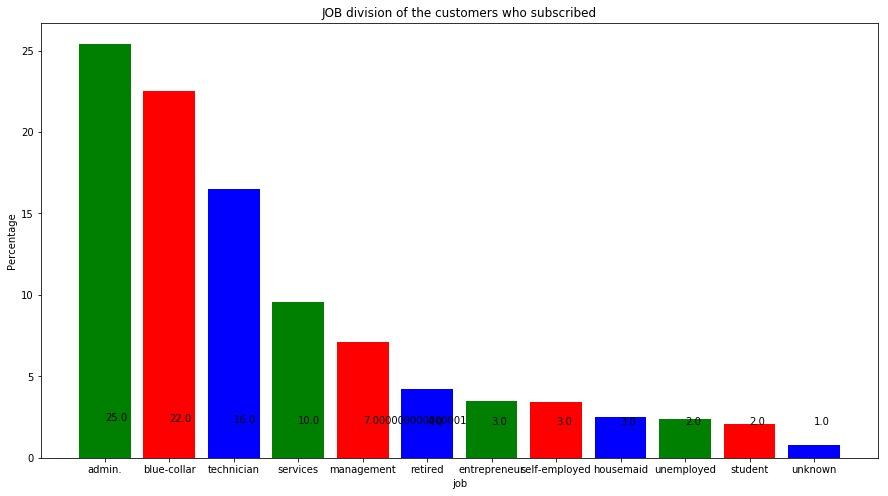

In [48]:
#If the piecharts aren't visible, run the code till end of eda. Not the whole notebook
hoverpie(subdf.columns[2],subdf,"JOB division of the customers who were contacted")
subbargraph(df.columns[2],df,"JOB division of the customers who subscribed")


-  There is a positive correlation with the customers who were contacted and the customers who took the term deposit. I.e The company is targetting the proper occupation group for the maximum business.


#### Martial Status

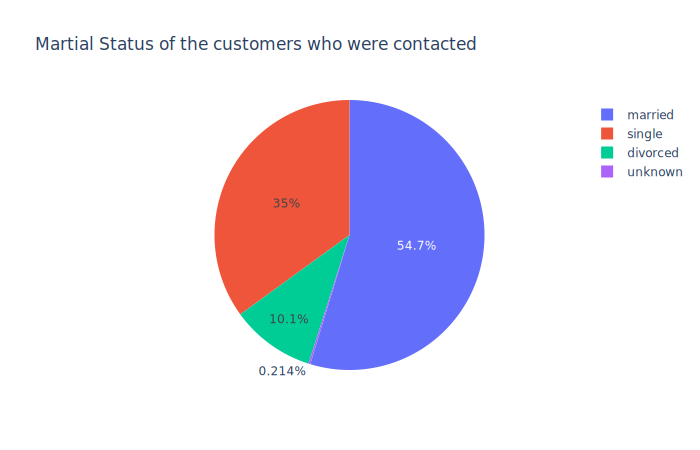

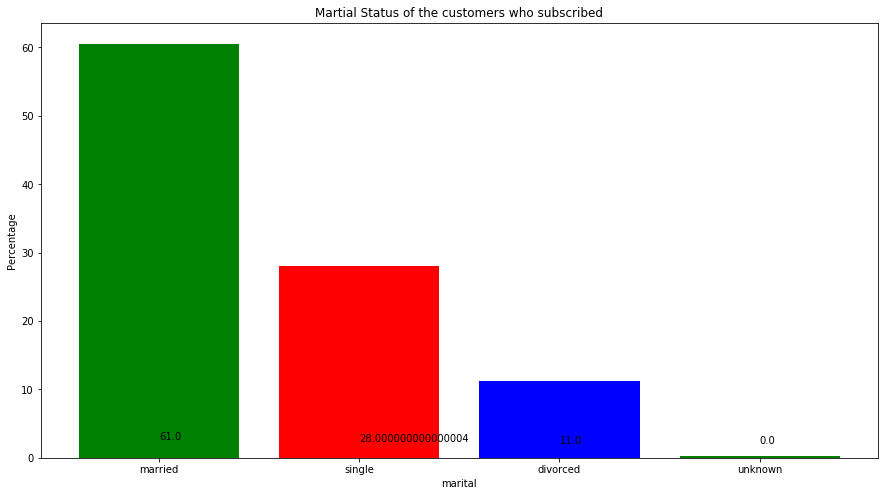

In [49]:
hoverpie(subdf.columns[3],subdf,"Martial Status of the customers who were contacted")
subbargraph(df.columns[3],df,"Martial Status of the customers who subscribed")

#### Education

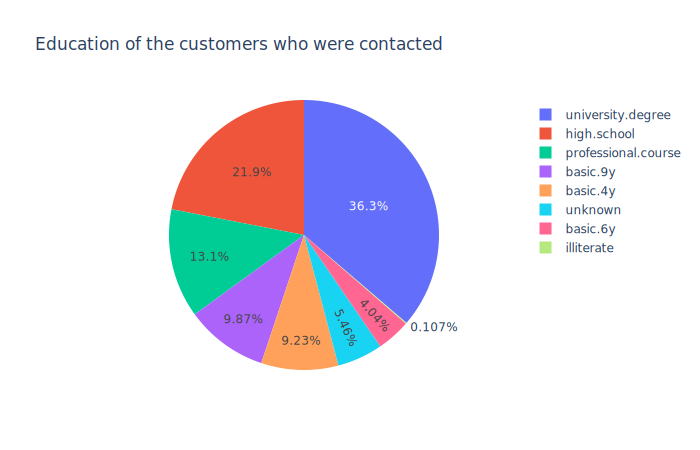

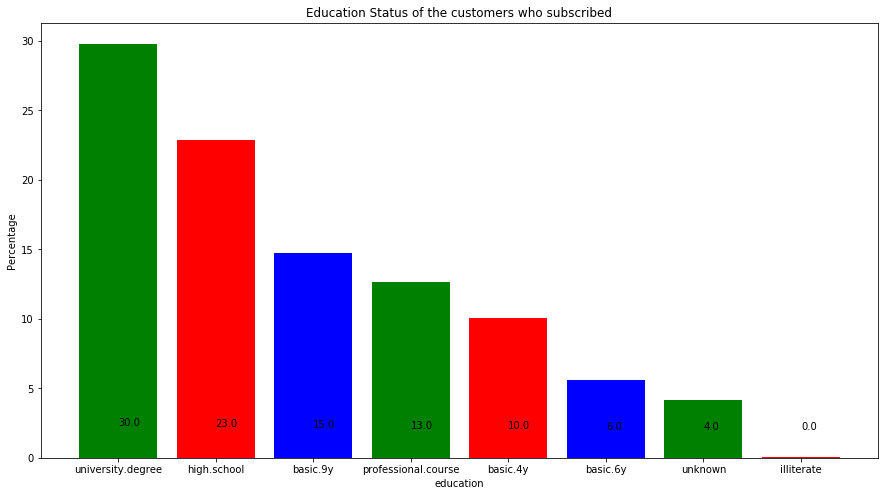

In [50]:
hoverpie(subdf.columns[4],subdf,"Education of the customers who were contacted")
subbargraph(df.columns[4],df,"Education Status of the customers who subscribed")

- Customers who did a professional course were not as inclined to a term deposit as customers who did a basic 9 year course

#### Housing and Personal Loans

In [51]:
h_count = df.groupby(['housing','y']).size() 
h_count.shape
print(h_count)

housing  y  
no       no     13317
         yes     1620
unknown  no       698
         yes       91
yes      no     15226
         yes     2026
dtype: int64


People with housing loan subscribed more than people without housing loans, which doesn't seem logical, since they need to pay back thier loans.

In [52]:
l_count = df.groupby(['loan','y']).size() 
l_count.shape
print(l_count)

loan     y  
no       no     24081
         yes     3093
unknown  no       698
         yes       91
yes      no      4462
         yes      553
dtype: int64


Unlike the case with housing loan, people with personal loan did not subscribe much as people with personal loans.
Personal loans seem to stress the customers for the need for money. This makes sense as personal loans generally have a higher rate of interest, therefore the need for the cash.

#### Last Contact Method

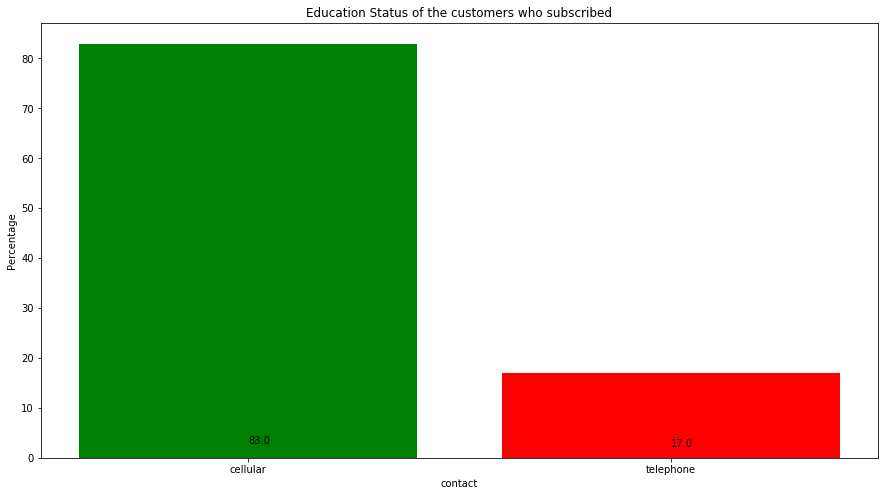

In [53]:
subbargraph('contact',subdf,"Education Status of the customers who subscribed")

Cellular is the better way to contact potential customers

#### Last contact month

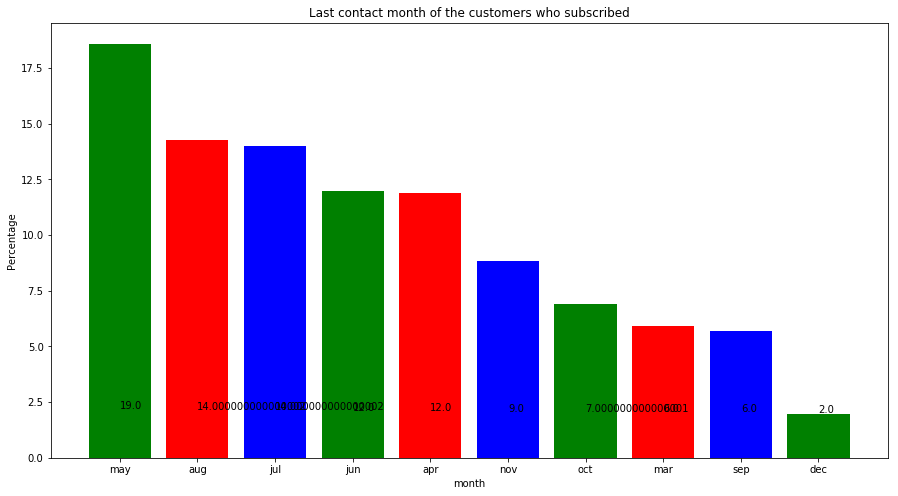

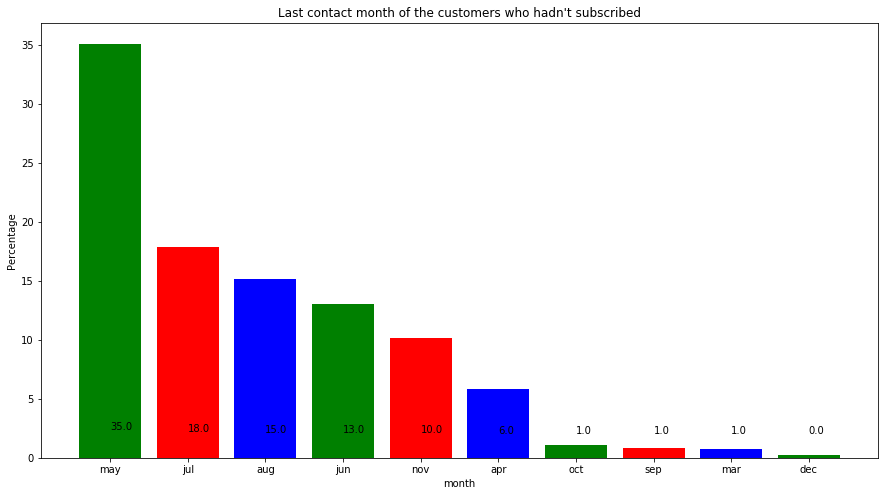

In [54]:
subbargraph('month',subdf,"Last contact month of the customers who subscribed")
subbargraph('month',nosubdf,"Last contact month of the customers who hadn't subscribed")

####  Outcome of the previous marketing campaign

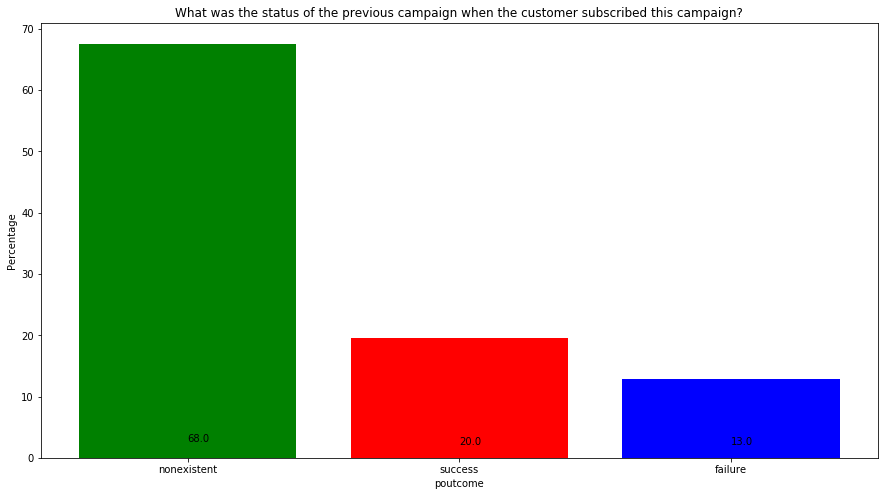

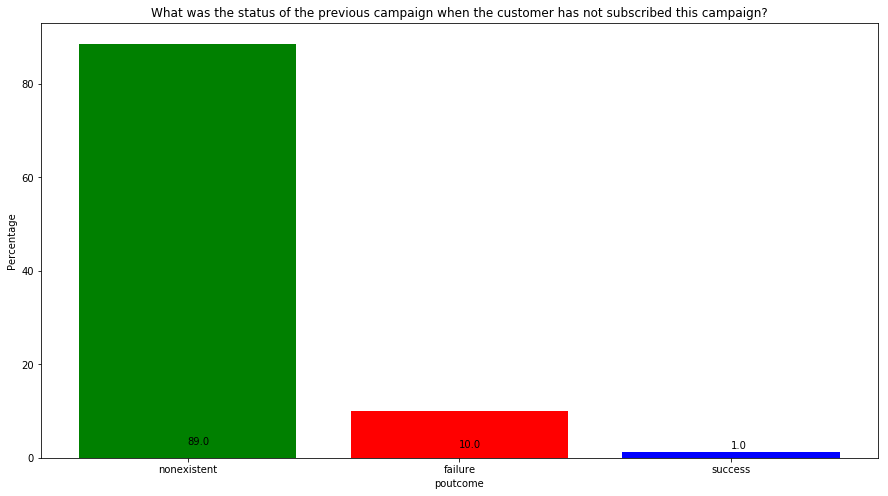

In [55]:
subbargraph('poutcome',subdf,"What was the status of the previous campaign when the customer subscribed this campaign?")
subbargraph('poutcome',nosubdf,"What was the status of the previous campaign when the customer has not subscribed this campaign?")

- Customers who subscribed to previous campaign in general subscribe for the next campaign as well.
- Most customers who haven't subscribed last campaign have a really low success rate for next campaign

#### Consumer confidence index

The index is calculated each month on the basis of a household survey of consumers' opinions on current conditions and future expectations of the economy.The more negative the number, the less confident they are on spending

In [56]:
cci_count = df.groupby(['month','cons.conf.idx','y']).size() 
print(cci_count)

month  cons.conf.idx  y  
apr    -47.1          no     1633
                      yes     362
       -34.6          no       69
                      yes      83
aug    -38.3          no       94
                      yes      85
       -36.1          no     3922
                      yes     230
       -31.4          no      404
                      yes     218
dec    -45.9          no        6
                      yes       1
       -33.0          no       72
                      yes      72
jul    -42.7          no     5019
                      yes     326
       -40.3          no      108
                      yes     148
       -33.6          no       95
                      yes      49
jun    -41.8          no     3365
                      yes     145
       -40.8          no      356
                      yes     212
       -39.8          no       89
                      yes      90
mar    -50.0          no      132
                      yes     103
       -34.8          

As expected , people declining to a term deposit is inclined to the negative index

### Data Preprocessing

In [32]:
#splitting the dataset into features and output variable
X=dataset.iloc[:,:-1]
Y=dataset.iloc[:,-1]

In [33]:
X=X.drop(['pdays'], axis=1)#dropping pdays columns in train,test dataset

In [34]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.19,random_state=0)

In [35]:
X_train.head(5)


,id,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
21153,26442,43,technician,married,university.degree,no,no,yes,cellular,nov,thu,113,5,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8
10999,13782,26,housemaid,single,high.school,unknown,yes,no,cellular,jul,thu,185,1,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1
29992,37484,36,admin.,married,university.degree,no,no,no,cellular,aug,thu,138,2,1,failure,-2.9,92.201,-31.4,0.873,5076.2
21062,26330,40,admin.,married,university.degree,no,yes,no,cellular,nov,thu,20,6,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8
32312,40356,75,retired,married,unknown,no,no,no,telephone,aug,tue,676,2,4,failure,-1.7,94.027,-38.3,0.899,4991.6


In [36]:
Y_train.head(5)

21153     no
10999     no
29992     no
21062     no
32312    yes
Name: y, dtype: object

In [37]:
X_toPredict=dataset_toPredict.iloc[:, :]

In [38]:
X_toPredict=X_toPredict.drop(['pdays'], axis=1)

In [39]:
X_toPredict.head(5)

,id,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,10,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,55,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,11,25,services,single,high.school,no,yes,no,telephone,may,mon,222,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,13,57,housemaid,divorced,basic.4y,no,yes,no,telephone,may,mon,293,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [40]:
#Getting the names of the features
X_col_name=X_train.columns

In [41]:
print(X_col_name)

Index(['id', 'age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


In [42]:
#Finding the categorical features
X_cat_index=[i for i in range(1,11)]
X_cat_index.append(14)

In [43]:
X_cat_col_name=[]
for i in X_cat_index:
    X_cat_col_name.append(X_col_name[i])

In [44]:
X_cat_index

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 14]

In [45]:
X_cat_col_name

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [46]:
#getting the ids of the 'tobePredicted' values
X_toPredict_ids=X_toPredict.iloc[:,0]

In [47]:
# #label encoding categorcial values of X
X_ce_ord = ce.OrdinalEncoder(cols = X_cat_col_name)
X_train=X_ce_ord.fit_transform(X_train)
X_test=X_ce_ord.transform(X_test)
X_toPredict=X_ce_ord.transform(X_toPredict)
print(X_train)





          id  age  job  marital  education  default  housing  loan  contact  \
21153  26442    1    1        1          1        1        1     1        1   
10999  13782    2    2        2          2        2        2     2        1   
29992  37484    3    3        1          1        1        1     2        1   
21062  26330    4    3        1          1        1        2     2        1   
32312  40356    5    4        1          3        1        1     2        2   
21987  27488    6    1        3          4        1        3     3        1   
29714  37128    7    5        2          2        1        3     3        1   
2879    3609    8    6        1          5        2        3     3        2   
27734  34638    9    7        3          4        1        2     2        1   
22023  27531    3    3        2          2        1        2     2        1   
14674  18355   10    3        2          2        1        2     2        1   
27685  34578   11    6        2          2        1 

In [48]:
# #label encoding categorcial values of Y
Y_ce_ord = ce.OrdinalEncoder()
Y_train=Y_ce_ord.fit_transform(Y_train)
Y_test=Y_ce_ord.transform(Y_test)

In [49]:
Y_train

,y
21153,1
10999,1
29992,1
21062,1
32312,2
21987,1
29714,2
2879,1
27734,1
22023,1


In [50]:
#One-hot encoding X
encoder = ce.OneHotEncoder(cols=X_cat_col_name, use_cat_names=True,
                        return_df=True)

In [51]:
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
X_toPredict = encoder.transform(X_toPredict)

In [52]:
#converting the dataframes to numpy arrays for subsequent data-preprocessing
X_train=X_train.to_numpy()
Y_train=Y_train.to_numpy()
X_test=X_test.to_numpy()
Y_test=Y_test.to_numpy()
X_toPredict=X_toPredict.to_numpy()

In [53]:
print(X_train[3,:])
print(X_train.shape)

[26330.        0.        0.        0.        1.        0.        0.
     0.        0.        0.        0.        0.        0.        0.
     0.        0.        0.        0.        0.        0.        0.
     0.        0.        0.        0.        0.        0.        0.
     0.        0.        0.        0.        0.        0.        0.
     0.        0.        0.        0.        0.        0.        0.
     0.        0.        0.        0.        0.        0.        0.
     0.        0.        0.        0.        0.        0.        0.
     0.        0.        0.        0.        0.        0.        0.
     0.        0.        0.        0.        0.        0.        0.
     0.        0.        0.        0.        0.        0.        0.
     0.        0.        0.        0.        1.        0.        0.
     0.        0.        0.        0.        0.        0.        0.
     1.        0.        0.        0.        1.        0.        0.
     0.        0.        0.        0.        0. 

In [54]:
Y_train[1:10]

array([[1],
       [1],
       [1],
       [2],
       [1],
       [2],
       [1],
       [1],
       [1]])

In [55]:
print(X_test.shape)
print(X_train.shape)
print(X_toPredict.shape)

(6266, 140)
(26712, 140)
(8210, 140)


In [56]:
#feature Scaling

sc_X=MinMaxScaler()
X_train[:,1:]=sc_X.fit_transform(X_train[:,1:])
X_test[:,1:]=sc_X.transform(X_test[:,1:])
X_toPredict[:,1:]=sc_X.transform(X_toPredict[:,1:])#No need to fit_transform as, sc_X has already been fitted




In [57]:
X_toPredict[1,:]

array([6.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [58]:
X_train.shape

(26712, 140)

In [59]:
Y_train.reshape(1,-1)
Y_train.shape

(26712, 1)

In [60]:
sc_Y=MinMaxScaler()
Y_train=Y_train.reshape(-1,1)
Y_test=Y_test.reshape(-1,1)
Y_train=sc_Y.fit_transform(Y_train)
Y_test=sc_Y.transform(Y_test)

C:\Users\91761\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int32 was converted to float64 by MinMaxScaler.



In [61]:
Y_train[1:20]

array([[0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.]])

## Modelling Approaches

### ANN with Keras

In [62]:
#Keras model

In [63]:
model = Sequential()
model.add(Dense(70, input_dim=139, activation='relu'))
model.add(Dense(60, activation='relu',kernel_regularizer=l2(0.01)))
model.add(Dense(51, activation='relu',kernel_regularizer=l2(0.01)))
model.add(Dense(48, activation='relu',kernel_regularizer=l2(0.01)))
model.add(Dense(48, activation='relu',kernel_regularizer=l2(0.01)))
model.add(Dense(50, activation='relu',kernel_regularizer=l2(0.01)))
model.add(Dense(48, activation='relu',kernel_regularizer=l2(0.01)))
model.add(Dense(40, activation='relu',kernel_regularizer=l2(0.01)))
model.add(Dense(40, activation='relu',kernel_regularizer=l2(0.01)))
model.add(Dense(39, activation='relu',kernel_regularizer=l2(0.01)))
model.add(Dense(30, activation='relu',kernel_regularizer=l2(0.01)))
model.add(Dense(1, activation='sigmoid'))

W1223 23:43:11.747721 12248 deprecation_wrapper.py:119] From C:\Users\91761\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1223 23:43:11.765669 12248 deprecation_wrapper.py:119] From C:\Users\91761\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1223 23:43:11.766667 12248 deprecation_wrapper.py:119] From C:\Users\91761\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [64]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

W1223 23:43:12.002072 12248 deprecation_wrapper.py:119] From C:\Users\91761\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1223 23:43:12.016000 12248 deprecation_wrapper.py:119] From C:\Users\91761\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W1223 23:43:12.020016 12248 deprecation.py:323] From C:\Users\91761\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [65]:
model.fit(X_train[:,1:], Y_train, epochs=28, batch_size=8)

W1223 23:43:12.270557 12248 deprecation_wrapper.py:119] From C:\Users\91761\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/28
26712/26712 [==============================] - 5s 189us/step - loss: 0.4891 - acc: 0.8863
Epoch 2/28
26712/26712 [==============================] - 4s 160us/step - loss: 0.3244 - acc: 0.8960
Epoch 3/28
26712/26712 [==============================] - 4s 161us/step - loss: 0.2997 - acc: 0.9036
Epoch 4/28
26712/26712 [==============================] - 4s 162us/step - loss: 0.2902 - acc: 0.9043
Epoch 5/28
26712/26712 [==============================] - 4s 161us/step - loss: 0.2819 - acc: 0.9058
Epoch 6/28
26712/26712 [==============================] - 4s 161us/step - loss: 0.2759 - acc: 0.9066
Epoch 7/28
26712/26712 [==============================] - 4s 161us/step - loss: 0.2723 - acc: 0.9086
Epoch 8/28
26712/26712 [==============================] - 4s 161us/step - loss: 0.2676 - acc: 0.9105
Epoch 9/28
26712/26712 [==============================] - 4s 161us/step - loss: 0.2657 - acc: 0.9098
Epoch 10/28
26712/26712 [==============================] - 4s 160us/step - loss: 0.2624 - a

In [66]:
_, accuracy = model.evaluate(X_test[:,1:], Y_test)
print('Accuracy: %.2f' % (accuracy*100))

6266/6266 [==============================] - 0s 27us/step
Accuracy: 90.97


In [67]:
Y_test_pred=model.predict_classes(X_test[:,1:])

In [68]:
print(f1_score(Y_test, Y_test_pred, average='binary'))

0.566615620214395


In [69]:
#Confusion matrix is  great way to represent precision and recall
#top left and bottom right are correct results.
cm=confusion_matrix(Y_test,Y_test_pred)
print(cm)

[[5330  244]
 [ 322  370]]


In [70]:
#model.save("trail_dropPdays.0.93138.h5")

In [71]:
Y_predictions = model.predict_classes(X_toPredict[:,1:])
print(Y_predictions)

[[0]
 [0]
 [0]
 ...
 [0]
 [1]
 [0]]


In [98]:
#function that creates a csv file
#inputs: Y_predictions-numpy array format, predictions that have been calculated.
#X_toPredict-numpy array that had ids for the required prediction
#filename:String format. Filename of csv file
def submit_tocsv(Y_predictions,X_toPredict,filename):
    Y_predictions=Y_predictions.flatten()
    Y_predictions=Y_predictions.tolist()
    print(Y_predictions)
    for i in range(len(Y_predictions)):
        if(Y_predictions[i]==0):
            Y_predictions[i]='no'
        else:
            Y_predictions[i]='yes'
    Y_predictions=np.asarray(Y_predictions)
    Y_predictions=Y_predictions.reshape(-1,1)
    X_toPredict_ids=X_toPredict[:,0]
    X_toPredict_ids=X_toPredict_ids.reshape(-1,1)
    final=np.concatenate((X_toPredict_ids,Y_predictions),axis=1)
    print(final)
    final_df = pd.DataFrame({'id': final[:, 0], 'y': final[:, 1]})
    final_df['id'] = final_df['id'].astype(float)
    final_df['id'] = final_df['id'].astype(int)
    final_df.to_csv(filename+".csv",index=False)
    
    

In [73]:
submit_tocsv(Y_predictions,X_toPredict,"keras1")

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

### Logistic Regression with sklearn

In [74]:
classifier=LogisticRegression(random_state=0,C=.01)
classifier.fit(X_train[:,1:], Y_train)

C:\Users\91761\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\91761\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [75]:
Y_test_pred_lr=classifier.predict(X_test[:,1:])

In [76]:
cm_lr=confusion_matrix(Y_test,Y_test_pred_lr)
print(cm_lr)

[[5534   40]
 [ 560  132]]


In [77]:
print(f1_score(Y_test, Y_test_pred_lr, average='binary'))

0.3055555555555556


In [78]:
Y_predictions_lr = classifier.predict(X_toPredict[:,1:])
print(Y_predictions_lr)

[0. 0. 0. ... 0. 0. 0.]


In [79]:
submit_tocsv(Y_predictions_lr,X_toPredict,"LR1")

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

### Support Vector Machine

In [80]:
from sklearn.svm import SVC

In [81]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10],  
              'gamma': [1, 0.1, 0.01], 
              'kernel': ['rbf']}  
  
classifier_svm = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,n_jobs=-1) 

In [82]:
Y_train_svm=Y_train.reshape(-1,1)
Y_train_svm.shape

(26712, 1)

In [85]:
classifier_svm.fit(X_train[:,1:], Y_train_svm)

C:\Users\91761\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning:

You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Done  14 out of  27 | elapsed: 11.3min remaining: 10.5min
[Parallel(n_jobs=-1)]: Done  24 out of  27 | elapsed: 16.4min remaining:  2.0min
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed: 18.2min finished
C:\Users\91761\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [93]:
Y_test_pred_svm=classifier_svm.predict(X_test[:,1:])

In [94]:
cm_svm=confusion_matrix(Y_test,Y_test_pred_svm)
print(cm_svm)

[[5510   64]
 [ 526  166]]


In [95]:
print(f1_score(Y_test, Y_test_pred_svm))

0.3600867678958785


In [96]:
Y_predictions_svm = classifier.predict(X_toPredict[:,1:])
print(Y_predictions_svm)

[0. 0. 0. ... 0. 0. 0.]


In [97]:
submit_tocsv(Y_predictions_svm,X_toPredict,"SVM1")

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

## Result and Analysis

According to the F1 score, calculated on the testing set, the Neural Network model outperformed SVM and Logistic Regression. 
A grid search technique has been used in SVM yet NEURAL NETWORK model that has been described gave the better performance. 
